In [1]:
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library("randomForestSRC")
library("ggpmisc")
library(patchwork)

Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ microbiome::alpha() masks ggplot2::alpha()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

 randomForestSRC 3.2.2 
 
 Type rfsrc.news() to see new features, changes, and bug fixes. 
 



In [2]:
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_counts_4_analysis.RData")
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_taxo_4_analysis.RData")


In [3]:
taxo_mat <- POR_taxo_4_analysis %>%
  rownames_to_column %>%
  filter(rowname != 'ASV_2') %>%
column_to_rownames("rowname")  %>%
mutate(family = ifelse(row.names(.) == "ASV_94", "ASV_94:Bacteroidia", family)) %>%
mutate(family = ifelse(row.names(.) == "ASV_68", "ASV_68", family)) %>%
  mutate(domain = ifelse(row.names(.) == "ASV_5", "ASV_5:core", domain)) %>%
  mutate(phylum = ifelse(row.names(.) == "ASV_5", "ASV_5:core", phylum)) %>%
  mutate(class = ifelse(row.names(.) == "ASV_5", "ASV_5:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_5", "ASV_5:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_5", "ASV_5:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_5", "ASV_5:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_5", "ASV_5:core", species)) %>%
 mutate(domain = ifelse(row.names(.) == "ASV_6", "ASV_6:core", domain)) %>%
  mutate(phylum = ifelse(row.names(.) == "ASV_6", "ASV_6:core", phylum)) %>%
  mutate(class = ifelse(row.names(.) == "ASV_6", "ASV_6:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_6", "ASV_6:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_6", "ASV_6:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_6", "ASV_6:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_6", "ASV_6:core", species)) %>%
mutate(class = ifelse(row.names(.) == "ASV_7", "SAR324:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_7", "SAR324:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_7", "SAR324:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_7", "SAR324:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_7", "SAR324:core", species)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_23", "Cyanobiaceae:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_23", "Cyanobiaceae:core", species))

In [4]:

meta = read.csv ("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_combo_meta.csv",
row.names=1, header = T)%>%
  mutate(
    Month = factor(Month, levels = month.name)
  ) %>%
  arrange(Month) %>%
arrange(collection_date)

ASV <- otu_table(as.matrix(POR_counts_4_analysis), 
                 taxa_are_rows = T)
TAX <- tax_table(as.matrix(taxo_mat))
SAMP <- sample_data(meta)

ps <- phyloseq(ASV, TAX, SAMP)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 27533 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 27533 taxa by 7 taxonomic ranks ]

In [5]:
euk_asvs <- c("ASV_10673","ASV_10883",	"ASV_11806","ASV_12333",	"ASV_12335",	"ASV_13587",	"ASV_14757",	"ASV_15238",	"ASV_15259",	"ASV_16364",	"ASV_16936",	"ASV_17406",	"ASV_18096",	"ASV_18375",	"ASV_18682",	"ASV_19529",	"ASV_19795",	"ASV_19953",	"ASV_2",	"ASV_20640",	"ASV_2100",	"ASV_22284",	"ASV_22692",	"ASV_23038",	"ASV_23144",	"ASV_24135",	"ASV_24243",	"ASV_27014",	"ASV_29665",	"ASV_30547",	"ASV_30626",	"ASV_30884",	"ASV_4161",	"ASV_4498",	"ASV_476",	"ASV_4797",	"ASV_4966",	"ASV_5018",	"ASV_5118",	"ASV_5154",	"ASV_6282",	"ASV_653",	"ASV_6843",	"ASV_7264",	"ASV_7427",	"ASV_8",	"ASV_9248",	"ASV_9692")
allTaxa = taxa_names(ps)
allTaxa <- allTaxa[!(allTaxa %in% euk_asvs)]
ps_fill_euk = prune_taxa(allTaxa, ps)
# new phyloseq object with just the taxa you kept.
ps_fill_euk

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 27486 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 27486 taxa by 7 taxonomic ranks ]

In [6]:
ps_fill = filter_taxa(ps_fill_euk, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 375 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 375 taxa by 7 taxonomic ranks ]

In [47]:
predictors <- t(otu_table(ps_fill))
dim(predictors)
# Make one column for our outcome/response variable 

response <- as.factor(sample_data(ps_fill)$N.N.uM)

# Combine them into 1 data frame
rf.data <- data.frame(response, predictors)
head(rf.data, n=2)


set.seed(2)
NO2.classify <- rfsrc(response~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
NO2.classify

tax_NO2= cbind(as.data.frame(NO2.classify$importance), as.data.frame(tax_table(ps_fill))) %>%
arrange(-all) %>%
head()

tax_NO2 %>%
arrange(-all)

[1] 363 375

,response,ASV_479,ASV_365,ASV_535,ASV_338,ASV_930,ASV_548,ASV_374,ASV_621,ASV_925,⋯,ASV_1185,ASV_1313,ASV_1321,ASV_1399,ASV_1429,ASV_1511,ASV_1546,ASV_1827,ASV_1966,ASV_2147
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-1009,0.893,0,0,14,0,0,0,0,0,0,⋯,6,0,0,0,0,0,0,0,0,0
bagnumber-1010,0.893,0,7,21,0,10,0,12,0,0,⋯,8,0,12,0,0,15,0,0,0,0


                         Sample size: 363
           Frequency of class labels: 37, 17, 35, 36, 25, 35, 34, 26, 30, 36, 15, 37
                     Number of trees: 400
           Forest terminal node size: 1
       Average no. of terminal nodes: 96.3475
No. of variables tried at each split: 20
              Total no. of variables: 375
       Resampling used to grow trees: swor
    Resample size used to grow trees: 229
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                   (OOB) Brier score: 0.04908633
        (OOB) Normalized Brier score: 0.64258468
                           (OOB) AUC: 0.94313656
   (OOB) Requested performance error: 0.29752066, 0.02702703, 1, 0.37142857, 0.25, 0.6, 0.22857143, 0.20588235, 0.53846154, 0.13333333, 0.11111111, 0.93333333, 0.05405405

Confusion matrix:

             predicted
  observed    0.128333333 0.272 0.30

In [8]:
TAX <- tax_table(as.matrix(tax_NO2))
ps <- phyloseq(ASV, TAX , SAMP)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 6 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 6 taxa by 19 taxonomic ranks ]

In [9]:
# Make one column for our outcome/response variable 

response <- as.factor(sample_data(ps_fill)$avgSST_degC)

# Combine them into 1 data frame
rf.data <- data.frame(response, predictors)
head(rf.data, n=2)


set.seed(2)
avgSST_degC.classify <- rfsrc(response~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
avgSST_degC.classify

cbind(as.data.frame(avgSST_degC.classify$importance), as.data.frame(tax_table(ps_fill))) %>%
arrange(-all) %>%
head()

,response,ASV_479,ASV_365,ASV_535,ASV_338,ASV_930,ASV_548,ASV_374,ASV_621,ASV_925,⋯,ASV_1185,ASV_1313,ASV_1321,ASV_1399,ASV_1429,ASV_1511,ASV_1546,ASV_1827,ASV_1966,ASV_2147
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-1009,29.63623347,0,0,14,0,0,0,0,0,0,⋯,6,0,0,0,0,0,0,0,0,0
bagnumber-1010,29.63623347,0,7,21,0,10,0,12,0,0,⋯,8,0,12,0,0,15,0,0,0,0


                         Sample size: 363
           Frequency of class labels: 26, 36, 35, 37, 35, 17, 30, 34, 15, 37, 25, 36
                     Number of trees: 400
           Forest terminal node size: 1
       Average no. of terminal nodes: 96.3475
No. of variables tried at each split: 20
              Total no. of variables: 375
       Resampling used to grow trees: swor
    Resample size used to grow trees: 229
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                   (OOB) Brier score: 0.04908633
        (OOB) Normalized Brier score: 0.64258468
                           (OOB) AUC: 0.94313656
   (OOB) Requested performance error: 0.30027548, 0.53846154, 0.27777778, 0.22857143, 0.02702703, 0.4, 1, 0.13333333, 0.20588235, 0.93333333, 0.05405405, 0.56, 0.11111111

Confusion matrix:

             predicted
  observed    25.96821074 25.9944225

,all,25.96821074,25.99442252,26.45430714,27.19707857,27.43930579,27.62378409,29.0513381,29.12767665,29.41867975,29.49291322,29.63623347,30.03815238,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_200,0.01820722,0.013068663,0.032090827,-0.00388326,0.393048859,-0.00388326,0.007994947,0.040774227,-5.281323e-17,-0.004530470,0.02204012,-0.008154845,0.001887696,Bacteria,Proteobacteria,Gammaproteobacteria,Thiomicrospirales,Thioglobaceae,SUP05 cluster,NA
ASV_305,0.01367261,0.010454930,0.032090827,0.05048238,0.049590277,-0.03300771,0.019987366,0.002265235,1.998737e-02,0.027182818,0.07530375,0.092421582,0.079283220,Bacteria,Proteobacteria,Alphaproteobacteria,SAR11 clade,Clade III,NA,NA
ASV_109,0.01354577,0.028751058,0.060406263,0.08154845,0.034896861,0.00776652,0.007994947,0.033978523,1.598989e-02,0.009060939,0.12489403,-0.019027973,-0.003775391,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,NA,NA
ASV_94,0.01297589,0.062729581,-0.013213870,0.13397246,0.011020061,0.04077423,0.011992420,0.018121879,1.998737e-02,0.022652349,0.06979372,0.029901100,-0.003775391,Bacteria,Bacteroidota,Bacteroidia,NA,ASV_94:Bacteroidia,NA,NA
ASV_172,0.01248102,0.023523593,0.001887696,0.12620594,0.022040123,0.00776652,0.023984840,0.031713288,7.994947e-03,0.031713288,0.11020061,-0.002718282,-0.003775391,Bacteria,Proteobacteria,Gammaproteobacteria,Cellvibrionales,Halieaceae,OM60(NOR5) clade,NA
ASV_5,0.01220561,0.005227465,0.049080089,0.00582489,0.007346708,0.02524119,0.015989893,0.201605902,2.198610e-02,0.054365637,0.02938683,0.005436564,-0.013213870,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core


In [10]:
# Make one column for our outcome/response variable 

response <- as.factor(sample_data(ps_fill)$Speed.cm.s)

# Combine them into 1 data frame
rf.data <- data.frame(response, predictors)
head(rf.data, n=2)


set.seed(2)
Speed.cm.s.classify <- rfsrc(response~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
Speed.cm.s.classify

cbind(as.data.frame(Speed.cm.s.classify$importance), as.data.frame(tax_table(ps_fill))) %>%
arrange(-all) %>%
head()

,response,ASV_479,ASV_365,ASV_535,ASV_338,ASV_930,ASV_548,ASV_374,ASV_621,ASV_925,⋯,ASV_1185,ASV_1313,ASV_1321,ASV_1399,ASV_1429,ASV_1511,ASV_1546,ASV_1827,ASV_1966,ASV_2147
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-1009,4.852118056,0,0,14,0,0,0,0,0,0,⋯,6,0,0,0,0,0,0,0,0,0
bagnumber-1010,4.852118056,0,7,21,0,10,0,12,0,0,⋯,8,0,12,0,0,15,0,0,0,0


                         Sample size: 363
           Frequency of class labels: 26, 35, 45, 25, 37, 36, 36, 34, 54, 35
                     Number of trees: 400
           Forest terminal node size: 1
       Average no. of terminal nodes: 92.5575
No. of variables tried at each split: 20
              Total no. of variables: 375
       Resampling used to grow trees: swor
    Resample size used to grow trees: 229
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                   (OOB) Brier score: 0.05701524
        (OOB) Normalized Brier score: 0.63350266
                           (OOB) AUC: 0.94750451
   (OOB) Requested performance error: 0.28374656, 0.53846154, 0.22857143, 0.13333333, 0.48, 0.08108108, 0.25, 0.13888889, 0.44117647, 0.27777778, 0.45714286

Confusion matrix:

             predicted
  observed    4.306533713 4.388159722 4.795925926 4.852118

,all,4.306533713,4.388159722,4.795925926,4.852118056,5.229809028,5.33154908,5.542543403,5.699322917,6.026627907,6.636767068,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_5,0.01908938,0.026137325,0.03300771,0.262767243,0.03533766,0.02387680,0.035866219,0.005663087,2.198610e-02,-0.003775391,0.033007708,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core
ASV_200,0.01611499,0.002613733,-0.01359141,0.039264071,0.01359141,0.02020345,0.020764653,0.022652349,9.993683e-03,0.201354210,0.013591409,Bacteria,Proteobacteria,Gammaproteobacteria,Thiomicrospirales,Thioglobaceae,SUP05 cluster,NA
ASV_109,0.01380598,0.020909860,0.06213216,0.025672662,0.02174625,0.12122068,0.052855480,0.015101566,0.000000e+00,0.026427740,0.019416299,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,NA,NA
ASV_305,0.01366525,0.015682395,0.03106608,0.033223445,0.07883017,0.02755015,0.009438479,0.120812526,2.398484e-02,0.040270842,-0.009708149,Bacteria,Proteobacteria,Alphaproteobacteria,SAR11 clade,Clade III,NA,NA
ASV_46,0.01087934,0.005227465,0.03494934,0.016611722,0.01630969,0.11203729,0.058518567,0.022652349,-4.526849e-17,0.020135421,-0.001941630,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Synechococcus CC9902,NA
ASV_68,0.01087156,-0.002613733,0.04271586,-0.007550783,0.01630969,0.02571348,0.073620133,0.011326174,7.795073e-02,0.023910812,0.033007708,NA,NA,NA,NA,ASV_68,NA,NA


In [36]:
# Make one column for our outcome/response variable 

response <- as.factor(sample_data(ps_fill)$cluster_depth)

# Combine them into 1 data frame
rf.data <- data.frame(response, predictors)
head(rf.data, n=2)


set.seed(2)
avgchla_mgm.3.classify <- rfsrc(response~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
avgchla_mgm.3.classify

cbind(as.data.frame(avgchla_mgm.3.classify$importance), as.data.frame(tax_table(ps_fill))) %>%
arrange(-all) %>%
head()

,response,ASV_479,ASV_365,ASV_535,ASV_338,ASV_930,ASV_548,ASV_374,ASV_621,ASV_925,⋯,ASV_1185,ASV_1313,ASV_1321,ASV_1399,ASV_1429,ASV_1511,ASV_1546,ASV_1827,ASV_1966,ASV_2147
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-1009,-20.9,0,0,14,0,0,0,0,0,0,⋯,6,0,0,0,0,0,0,0,0,0
bagnumber-1010,-20.9,0,7,21,0,10,0,12,0,0,⋯,8,0,12,0,0,15,0,0,0,0


                         Sample size: 359
           Frequency of class labels: 9, 2, 11, 10, 9, 25, 12, 6, 11, 29, 13, 25, 23, 37, 11, 23, 31, 37, 12, 11, 12
                     Number of trees: 400
           Forest terminal node size: 1
       Average no. of terminal nodes: 126.8
No. of variables tried at each split: 20
              Total no. of variables: 375
       Resampling used to grow trees: swor
    Resample size used to grow trees: 227
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                   (OOB) Brier score: 0.0401947
        (OOB) Normalized Brier score: 0.88629308
                           (OOB) AUC: 0.74761032
   (OOB) Requested performance error: 0.67130919, 1, 1, 1, 1, 1, 0.76, 0.91666667, 1, 1, 0.62068966, 0.92307692, 0.2, 0.95652174, 0.35135135, 1, 0.56521739, 0.4516129, 0.32432432, 1, 0.90909091, 0.91666667

Confusion matr

,all,-20.9,-20.8,-20.6,-19.6,-18.8,-18.7,-18.6,-17.9,-17.8,⋯,-11.7,-11.6,-10.7,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_12,0.014568167,0.000000000,0,0.000000000,0.000000000,-7.544748e-18,-0.005436564,-7.544748e-18,0.00000000,0.018533740,⋯,-7.544748e-18,0.012355826,-0.011326174,Bacteria,Spirochaetota,Spirochaetia,Spirochaetales,Spirochaetaceae,Spirochaeta 2,NA
ASV_3,0.011831445,0.000000000,0,-0.006177913,0.013591409,-7.550783e-03,0.035337664,1.132617e-02,-0.01132617,0.030889566,⋯,8.494631e-02,-0.006177913,0.016989261,Bacteria,Spirochaetota,Spirochaetia,Spirochaetales,Spirochaetaceae,Spirochaeta 2,NA
ASV_25,0.006888383,0.007550783,0,-0.006177913,0.000000000,-1.510157e-02,0.016309691,2.265235e-02,0.00000000,0.018533740,⋯,1.698926e-02,0.037067479,-0.016989261,NA,NA,NA,NA,NA,NA,NA
ASV_20,0.004834363,0.000000000,0,0.012355826,0.000000000,1.510157e-02,0.005436564,0.000000e+00,-0.01132617,0.024711653,⋯,1.698926e-02,0.006177913,0.005663087,Bacteria,NA,NA,NA,NA,NA,NA
ASV_273,0.004224605,0.000000000,0,0.000000000,-0.006795705,0.000000e+00,0.013591409,-7.544748e-18,0.00000000,0.000000000,⋯,0.000000e+00,0.018533740,0.000000000,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NA,NA
ASV_699,0.004214821,0.000000000,0,0.000000000,0.000000000,0.000000e+00,0.000000000,7.544748e-18,0.00000000,0.006177913,⋯,5.096778e-02,0.030889566,-0.005663087,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS5 marine group,NA


In [12]:
colnames(sample_data(ps_fill))

[1] "collection_date"       "Speed.cm.s."           "Bearing.degrees."     
 [4] "Velocity.N.cm.s."      "Velocity.E.cm.s."      "Temperature.C."       
 [7] "reef"                  "Genotype"              "Fragment_number"      
[10] "Month"                 "Year"                  "Fragment_num"         
[13] "day"                   "Survey."               "LiveFrag"             
[16] "L"                     "W"                     "H"                    
[19] "Adjusted.Area"         "S01FragCount"          "Year.x"               
[22] "Si.uM."                "NO2.uM."               "N.N.uM."              
[25] "NO3.uM."               "PO4.uM."               "sample_ID"            
[28] "sample_ID2"            "Health"                "Month.x"              
[31] "Samp_trip"             "joining_info"          "order"                
[34] "species"               "time_Reef"             "Cluster"              
[37] "sampling_trip"         "X"                     "colour_reef"          
[40] "colour_genotype"       "colour_reef_genotype"  "colour_timepoint"     
[43] "colour_timepoint_reef" "cluster_latitude"      "cluster_longitude"    
[46] "cluster_depth"         "depth"                 "Year.y"               
[49] "Month.y"               "Lat_decimal"           "Long_decimal"         
[52] "avgchla_mgm.3"         "sdchla_mgm.3"          "avgSST_degC"          
[55] "sdSST_degC"

In [13]:


# Make one column for our outcome/response variable 

response <- as.factor(sample_data(ps_fill)$Si.uM.)

# Combine them into 1 data frame
rf.data <- data.frame(response, predictors)
head(rf.data, n=2)


set.seed(2)
Si.uM.classify <- rfsrc(response~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
Si.uM.classify

cbind(as.data.frame(Si.uM.classify$importance), as.data.frame(tax_table(ps_fill))) %>%
arrange(-all) %>%
head()

,response,ASV_479,ASV_365,ASV_535,ASV_338,ASV_930,ASV_548,ASV_374,ASV_621,ASV_925,⋯,ASV_1185,ASV_1313,ASV_1321,ASV_1399,ASV_1429,ASV_1511,ASV_1546,ASV_1827,ASV_1966,ASV_2147
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-1009,0.706,0,0,14,0,0,0,0,0,0,⋯,6,0,0,0,0,0,0,0,0,0
bagnumber-1010,0.706,0,7,21,0,10,0,12,0,0,⋯,8,0,12,0,0,15,0,0,0,0


                         Sample size: 363
           Frequency of class labels: 30, 15, 37, 34, 35, 26, 17, 36, 37, 36, 25, 35
                     Number of trees: 400
           Forest terminal node size: 1
       Average no. of terminal nodes: 96.3475
No. of variables tried at each split: 20
              Total no. of variables: 375
       Resampling used to grow trees: swor
    Resample size used to grow trees: 229
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                   (OOB) Brier score: 0.04908633
        (OOB) Normalized Brier score: 0.64258468
                           (OOB) AUC: 0.94313656
   (OOB) Requested performance error: 0.29476584, 0.13333333, 0.93333333, 0.02702703, 0.23529412, 0.2, 0.53846154, 1, 0.27777778, 0.05405405, 0.11111111, 0.52, 0.37142857

Confusion matrix:

             predicted
  observed    0.033333333 0.06666666

,all,0.033333333,0.066666667,0.159166667,0.2,0.308,0.335,0.426166667,0.504,0.5265,0.613,0.706,1.904166667,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_200,0.01751340,0.036243758,0.00453047,3.654987e-01,-0.007994947,-0.009708149,-0.01045493,0.007994947,0.03020313,0.02938683,0.030203131,0.010873127,-0.01164978,Bacteria,Proteobacteria,Gammaproteobacteria,Thiomicrospirales,Thioglobaceae,SUP05 cluster,NA
ASV_109,0.01418168,0.020387114,0.02265235,3.857022e-02,0.015989893,0.073781935,0.04443345,0.039974733,0.03020313,0.11754732,0.015101566,0.002718282,0.01164978,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,NA,NA
ASV_94,0.01367406,0.015856644,0.02265235,1.285674e-02,0.029981050,0.116497793,0.08102571,0.023984840,-0.02454004,0.05142695,-0.001887696,0.043492509,0.06795705,Bacteria,Bacteroidota,Bacteroidia,NA,ASV_94:Bacteroidia,NA,NA
ASV_305,0.01347173,-0.009060939,-0.00453047,6.061034e-02,0.017988630,0.033007708,0.02875106,0.000000000,0.04341700,0.07346708,0.075507829,0.116886119,-0.03494934,Bacteria,Proteobacteria,Alphaproteobacteria,SAR11 clade,Clade III,NA,NA
ASV_172,0.01270109,0.013591409,0.02265235,2.387680e-02,0.023984840,0.116497793,0.02875106,0.027982313,-0.01510157,0.09367052,0.007550783,0.016309691,0.02912445,Bacteria,Proteobacteria,Gammaproteobacteria,Cellvibrionales,Halieaceae,OM60(NOR5) clade,NA
ASV_5,0.01255365,0.194810198,0.04077423,7.544748e-18,0.029981050,0.015533039,-0.01306866,0.035977259,0.04530470,0.02387680,-0.005663087,0.013591409,0.03689097,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core


In [14]:
# Make one column for our outcome/response variable 

response <- as.factor(sample_data(ps_fill)$PO4.uM.)

# Combine them into 1 data frame
rf.data <- data.frame(response, predictors)
head(rf.data, n=2)


set.seed(2)
PO4.uM.classify <- rfsrc(response~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
PO4.uM.classify

cbind(as.data.frame(PO4.uM.classify$importance), as.data.frame(tax_table(ps_fill))) %>%
arrange(-all) %>%
head()

,response,ASV_479,ASV_365,ASV_535,ASV_338,ASV_930,ASV_548,ASV_374,ASV_621,ASV_925,⋯,ASV_1185,ASV_1313,ASV_1321,ASV_1399,ASV_1429,ASV_1511,ASV_1546,ASV_1827,ASV_1966,ASV_2147
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-1009,0.0685,0,0,14,0,0,0,0,0,0,⋯,6,0,0,0,0,0,0,0,0,0
bagnumber-1010,0.0685,0,7,21,0,10,0,12,0,0,⋯,8,0,12,0,0,15,0,0,0,0


                         Sample size: 363
           Frequency of class labels: 37, 37, 36, 26, 36, 15, 30, 17, 35, 25, 35, 34
                     Number of trees: 400
           Forest terminal node size: 1
       Average no. of terminal nodes: 96.3475
No. of variables tried at each split: 20
              Total no. of variables: 375
       Resampling used to grow trees: swor
    Resample size used to grow trees: 229
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                   (OOB) Brier score: 0.04908633
        (OOB) Normalized Brier score: 0.64258468
                           (OOB) AUC: 0.94313656
   (OOB) Requested performance error: 0.29476584, 0.05405405, 0.02702703, 0.27777778, 0.53846154, 0.11111111, 0.93333333, 0.13333333, 1, 0.22857143, 0.52, 0.37142857, 0.20588235

Confusion matrix:

             predicted
  observed    0.023 0.0296666

,all,0.023,0.029666667,0.037,0.039,0.044,0.046666667,0.05,0.055,0.056,0.0685,0.074833333,0.082857143,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_200,0.01945677,0.02938683,0.391212182,2.454004e-02,0.013068663,0.026427740,0.009060939,0.036243758,0.011992420,1.508950e-17,0.01359141,-0.00776652,-0.007994947,Bacteria,Proteobacteria,Gammaproteobacteria,Thiomicrospirales,Thioglobaceae,SUP05 cluster,NA
ASV_109,0.01773895,0.17081095,0.034896861,7.362013e-02,0.018296128,0.026427740,0.004530470,0.018121879,0.039974733,8.931497e-02,0.01902797,0.01359141,0.005996210,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,NA,NA
ASV_305,0.01527381,0.04959028,0.067957046,3.775391e-02,0.015682395,0.107598656,0.004530470,0.002265235,0.019987366,4.465749e-02,0.12775925,-0.03883260,0.029981050,Bacteria,Proteobacteria,Alphaproteobacteria,SAR11 clade,Clade III,NA,NA
ASV_94,0.01500646,0.09734388,0.007346708,-1.887696e-03,0.057502116,0.015101566,-0.009060939,0.018121879,-0.003997473,1.223227e-01,0.04892907,0.04465749,0.039974733,Bacteria,Bacteroidota,Bacteroidia,NA,ASV_94:Bacteroidia,NA,NA
ASV_172,0.01318233,0.11203729,0.022040123,2.263424e-17,0.020909860,-0.001887696,0.022652349,0.033978523,0.015989893,1.262059e-01,0.01087313,0.01359141,0.017988630,Bacteria,Proteobacteria,Gammaproteobacteria,Cellvibrionales,Halieaceae,OM60(NOR5) clade,NA
ASV_5,0.01304075,0.02204012,0.005510031,5.474318e-02,0.002613733,0.001887696,0.031713288,0.228788721,0.027982313,3.883260e-03,0.01902797,0.03106608,0.001998737,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core


In [50]:
GoodTaxa = c(
"ASV_172",
"ASV_46",
"ASV_109",
"ASV_305",
"ASV_94",
"ASV_5",
"ASV_200",
"ASV_1827",
"ASV_68", 
"ASV_12",
"ASV_3",
"ASV_25",
"ASV_20",
"ASV_273")

In [54]:
ps_meta= as(sample_data(ps_fill), "data.frame")
ps_meta_envs = ps_meta %>% select("Genotype", "Samp_trip", "reef",'Speed.cm.s.', 'N.N.uM.','PO4.uM.', 'Si.uM.',
                 "avgSST_degC", "cluster_depth")


In [55]:
sum_ps   <- ps_fill %>%
  tax_glom(taxrank = "order") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()

Warning message in psmelt(.):
“The sample variables: 
order, species
 have been renamed to: 
sample_order, sample_species
to avoid conflicts with taxonomic rank names.”


In [56]:
y_columns <- names(ps_meta_envs[4:9])

In [57]:
y_columns 

[1] "Speed.cm.s."   "N.N.uM."       "PO4.uM."       "Si.uM."       
[5] "avgSST_degC"   "cluster_depth"

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 619 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 619 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 619 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula = 'y ~ x'
Warning me

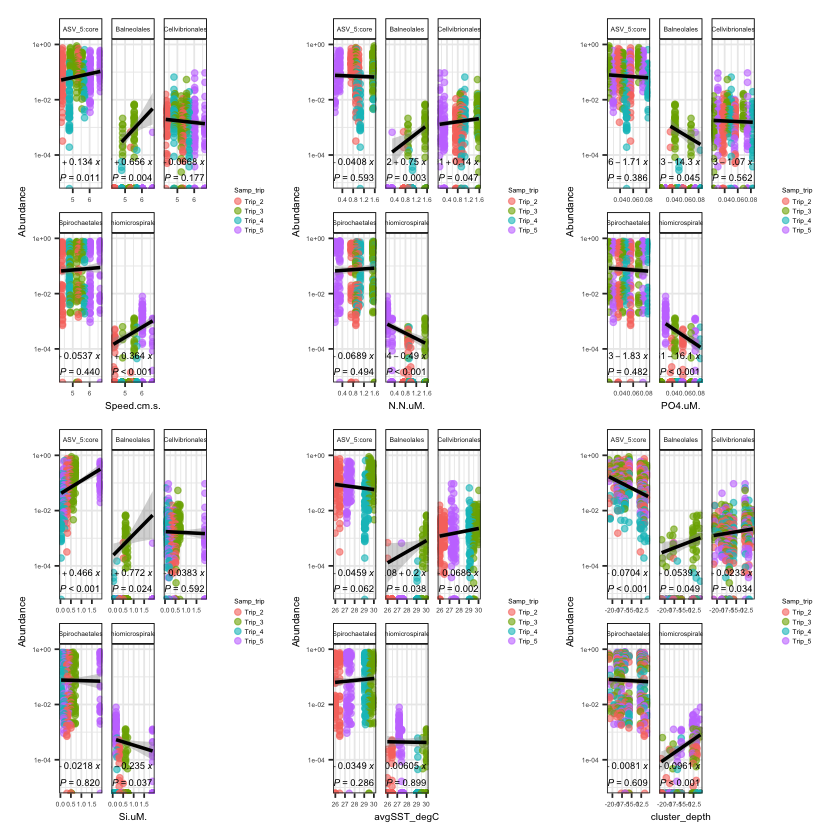

In [58]:



# Create an empty list to store the plots
plots <- list()

# Loop through each y variable and create a plot
for (y_var in y_columns) {
  plot <- sum_ps %>%
    #filter(Abundance>=0.1) %>%
filter(OTU %in% GoodTaxa) %>%
    ggplot(aes( x = .data[[y_var]], y = Abundance, color = Samp_trip)) +
    geom_point(alpha = 0.6) +
    theme_bw() +
    facet_wrap(.~order, scales="free_x") +



    theme(legend.title = element_text(size=5)) +
scale_y_continuous(trans = "log10") +
labs(fill='Taxon')  +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5)) +
theme(axis.title.x = element_text(size = 6)) +
theme(axis.title.y = element_text(size = 6)) +
theme(axis.text.x = element_text(size =4)) +
theme(strip.text.y = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
guides(color = guide_legend(keywidth = 0.2, , keyheight =.40, ncol=1)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=4)) +
theme(strip.text.x = element_text(size = 4)) +

    geom_smooth(method = 'lm', color = 'black') +
    
    stat_poly_eq(
      formula = y ~ x,
      eq.with.lhs = "italic(hat(y))~`=`~",
      aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
      parse = TRUE,
      label.y = "bottom",
      label.x = "right",
      color = "black",
      rr.digits = 3,
      size = 2
    ) +
    
    stat_poly_eq(
      aes(label = paste(..eq.label.., sep = "~~~")),
      label.y = 0.15,
      eq.with.lhs = "italic(hat(y))~`=`~",
      eq.x.rhs = "~italic(x)",
      formula = y ~ x,
      parse = TRUE,
      size = 2,
      label.x = "right",
      color = "black"
    )
  
  # Add the plot to the list
  plots[[y_var]] <- plot
}

# Combine all plots into a single plot
combined_plot <- wrap_plots(plots)

# Print the combined plot
print(combined_plot)

In [59]:
dim(otu_table(ps_fill))

dim(ps_meta_envs[4:8])

[1] 375 363

[1] 363   5

In [60]:


# Define data sets to cross-correlate
x <- log10(otu_table(t(ps_fill))) # OTU Log10 (44 samples x 130 genera)
y <- as.matrix(ps_meta_envs[4:9]) # Lipids (44 samples x 389 lipids)

# Cross correlate data sets
correlations <- associate(x, y, method = "spearman", mode = "matrix", p.adj.threshold = 0.05, n.signif = 1)


taxo_ASVs = taxo_mat %>% rownames_to_column("ASVs") 
# Or, alternatively, the same output is also available in a handy table format
correlation.table <- associate(x, y, method = "spearman", mode = "table", p.adj.threshold = 0.05, n.signif = 1)  %>% 
rename(ASVs=X1) %>%
rename(Env=X2) %>%
left_join(taxo_ASVs)

(head(correlation.table))


Joining with `by = join_by(ASVs)`


,ASVs,Env,Correlation,p.adj,domain,phylum,class,order,family,genus,species
,<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ASV_1966,avgSST_degC,0.5210560,2.652396e-23,Bacteria,Proteobacteria,Alphaproteobacteria,Parvibaculales,PS1 clade,NA,NA
2,ASV_1069,avgSST_degC,0.5000454,2.602094e-21,Bacteria,Proteobacteria,Alphaproteobacteria,SAR11 clade,Clade III,NA,NA
3,ASV_1827,avgSST_degC,0.4851537,5.899444e-20,Bacteria,Bacteroidota,Rhodothermia,Balneolales,Balneolaceae,Balneola,NA
4,ASV_865,N.N.uM.,0.4716572,9.347654e-19,Bacteria,Proteobacteria,Gammaproteobacteria,Alteromonadales,Colwelliaceae,Thalassotalea,NA
5,ASV_68,N.N.uM.,0.4499074,7.743973e-17,NA,NA,NA,NA,ASV_68,NA,NA
6,ASV_5,Si.uM.,0.4483922,8.807782e-17,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core


In [61]:
#fil_good= subtable %>%
filter(ASVs %in% GoodTaxa)

ERROR: Error in eval(expr, envir, enclos): object 'ASVs' not found


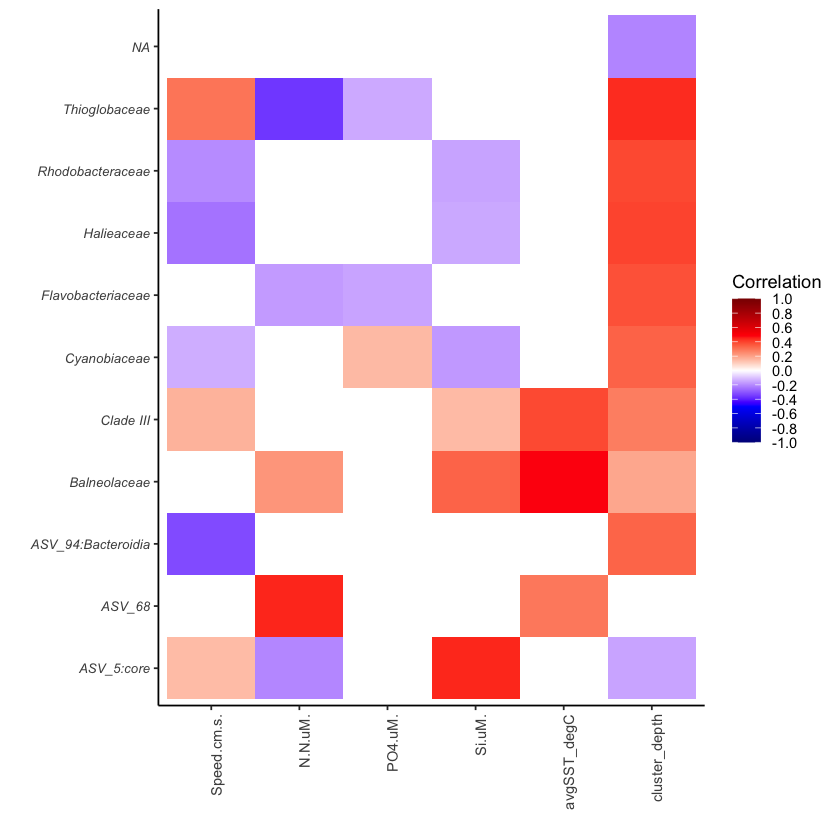

In [62]:
subtable <- filter(correlation.table, p.adj < 0.05)

# Arrange the figure
subtable %>%
filter(ASVs %in% GoodTaxa) %>%
ggplot(aes(x = Env, y = family, fill = Correlation)) + geom_tile(aes(fill = Correlation)) + 
theme_classic() +
 scale_fill_gradientn("Correlation", 
                       breaks = seq(from = -1, to = 1, by = 0.2), 
                   colours = c("darkblue", "blue", "white", "red", "darkred"), 
                   limits = c(-1,1)) +
theme(axis.text.x=element_text(angle = 90, hjust=1),
               axis.text.y=element_text(size = 8, , face = "italic")) +
 xlab("") + ylab("") 

